In [1]:
import sys
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    # montar el drive, que es donde tenemos el dataset
    from google.colab import drive
    drive.mount("/content/drive")
    data_dir = "/content/drive/MyDrive/Colab Notebooks/opencv/imagenes/"
    sys.path.append(data_dir)
else:
    import os
    data_dir = "/"


In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (15.0, 10.0)

In [5]:
img_file = data_dir + "suaves.jpg"
# Image operation using thresholding
img1 = cv.imread(img_file)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
plt.imshow(img1)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


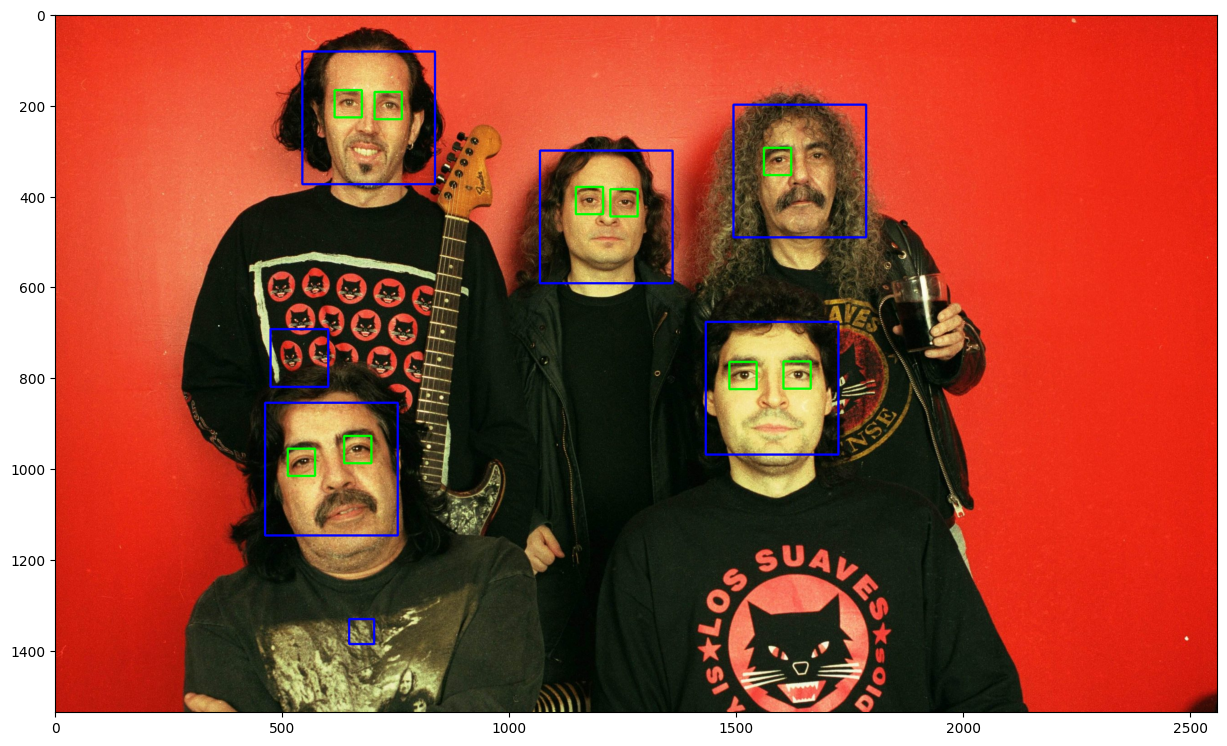

In [ ]:
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + \
                                'haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + \
                                'haarcascade_eye.xml')

gris = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
caras = face_cascade.detectMultiScale(gris, 2.3, 1)
img2 = img1.copy()
for (x,y,w,h) in caras:
  cv.rectangle(img2, (x,y), (x+w, y+h), (0,0,255), 4)
  roi = gris[y:y+h, x:x+w]
  roi_color = img2[y:y+h, x:x+w]
  ojos = eye_cascade.detectMultiScale(roi, 3, 1)
  for (x,y,w,h) in ojos:
    cv.rectangle(roi_color, (x,y), (x+w, y+h), (0,255, 0), 4)

plt.imshow(img2)